In [2]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r'C:\Users\ASUS\Desktop\HousingData.csv', header=None,delimiter='\s+')
data=data.values
X =data[:,:13]
Y=data[:,13]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [3]:
#Normalization

mean = np.mean(X,axis= 0)
myStd = np.std(X,axis= 0)
print(mean.shape)
print(myStd.shape)
X=(X-mean)/myStd
print(X)

(13,)
(13,)
[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5740\545700201.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


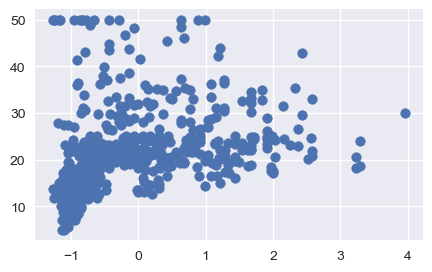

In [4]:
plt.style.use('seaborn')
plt.figure(figsize=(5,3))
plt.scatter(X[:,7],Y)

In [5]:
ones =np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape)
print(X)

(506, 14)
[[ 1.         -0.41978194  0.28482986 ... -1.45900038  0.44105193
  -1.0755623 ]
 [ 1.         -0.41733926 -0.48772236 ... -0.30309415  0.44105193
  -0.49243937]
 [ 1.         -0.41734159 -0.48772236 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [ 1.         -0.41344658 -0.48772236 ...  1.17646583  0.44105193
  -0.98304761]
 [ 1.         -0.40776407 -0.48772236 ...  1.17646583  0.4032249
  -0.86530163]
 [ 1.         -0.41500016 -0.48772236 ...  1.17646583  0.44105193
  -0.66905833]]


[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


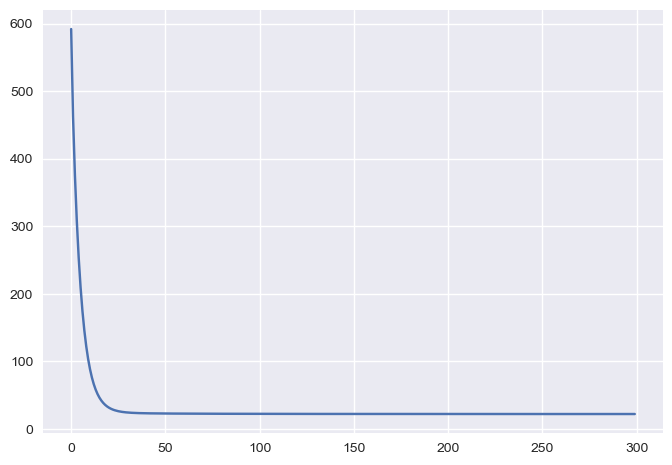

In [6]:
def hypothesis(x, theta):
    n = x.shape[0]
    y_pre = 0

    for i in range(n):
        y_pre += theta[i] * x[i]
    
    return y_pre

def error(X, Y, theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_act = Y[i]
        y_pre = hypothesis(X[i], theta)
        e += (y_act - y_pre) ** 2

    return e / m

def gradient(X, Y, theta):
    m, n = X.shape
    grad = np.zeros((n,))
    
    for j in range(n):   
        for i in range(m):
            y_act = Y[i]
            y_pre = hypothesis(X[i], theta)
            grad[j] += (y_pre - y_act) * X[i][j]

    return grad / m

def gradient_descent(X, Y, lr=0.1, max_epoch=300):
    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []
   
    for i in range(max_epoch):
        e = error(X, Y, theta)
        error_list.append(e)   
        grad = gradient(X, Y, theta)

        for j in range(n):
            theta[j] = theta[j] - lr * grad[j]

    return theta, error_list


theta, error_list = gradient_descent(X, Y)
print(theta)

plt.plot(error_list)
